In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
# Read in CSV file

df = pd.read_csv('plate9290_RVs.csv').drop(['Unnamed: 0', 'Plate ID'], axis=1)

In [3]:
df = df.sort_values(['Target ID'], ascending=True)

In [4]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s)
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636
...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245


## Step 1
- Calculate ΔRV_j = RV_j - < RV >
- Plot ΔRV vs MJD, try to locate pattern

#### Notes
- j denotes epoch (MJD?)
- 'epoch', an arbitrarily fixed date relative to which stellar/planetary measurements are expressed

#### Questions
- Does it matter that uncertainty is for OBSVREL not OBSVHELIO? --> no

In [5]:
# Identify list of unique targets

unique_targets = Counter(df['Target ID'])
unique_targets_list = unique_targets.keys()

In [6]:
# unique_targets

In [7]:
len(unique_targets)

213

In [8]:
# Create list of RV_j values

RV_j = list(df['OBSVHELIO (km/s)'])

In [74]:
# Calculate <RV>, i.e. weighted RV_j values

weightedRVs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    targetRV_j = list(target_df['OBSVHELIO (km/s)'])
    sigma = list(target_df['OBSVREL Error (km/s)'])
    weight = [1 / (sigma[s]**2) for s in range(len(sigma))]
    weightedavg = sum([targetRV_j[i] * weight[i] for i in range(len(targetRV_j))]) / sum(weight)
    for j in range(16):
        weightedRVs.append(weightedavg)

In [108]:
# Check list of <RV> values

# weightedRVs

In [76]:
# Append <RV> values to dataframe

df['<RV>'] = weightedRVs
# df['<RV>'] = [abs(rv) for rv in weightedRVs] # Don't want the abs value!

In [77]:
df

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,0.010245,-86.476541,-0.089163
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,0.019952,-86.476541,0.380461
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,0.018672,-86.476541,-0.054289
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,0.008684,-86.476541,-0.055899
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,0.009636,-86.476541,-0.093024
...,...,...,...,...,...,...
3393,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,0.016809,-26.537180,0.007095
3392,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,0.010706,-26.537180,-0.205963
3406,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,0.021124,-26.537180,-0.062063
3398,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,0.009245,-26.537180,-0.028696


In [78]:
# Calculate ΔRV_j = RV_j - < RV >

deltaRV_j = [RV_j[i] - weightedRVs[i] for i in range(len(RV_j))]

In [79]:
# Append ΔRV_j values to dataframe as ΔRV

df['ΔRV'] = deltaRV_j

In [80]:
# Check updated dataframe

df.sort_values('ΔRV', ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
1959,apo25m.5226.150-08-RV.2M03335959+4534540,58006,15.602287,3.578358,-28.386229,43.988516
1512,apo25m.5226.150-08-RV.2M03322119+4723171,58032,17.542360,1.956752,-19.569800,37.112160
991,apo25m.5226.150-08-RV.2M03303128+4559542,58143,20.871874,0.993278,-9.691109,30.562983
2162,apo25m.5226.150-08-RV.2M03343562+4544527,57734,-0.000636,1.380878,-29.698267,29.697631
3149,apo25m.5226.150-08-RV.2M03400642+4701351,58087,-17.536911,2.266302,-46.019250,28.482339
...,...,...,...,...,...,...
952,apo25m.5226.150-08-RV.2M03302753+4708196,58032,-42.902916,2.925044,-13.774434,-29.128482
1822,apo25m.5226.150-08-RV.2M03332225+4725193,58114,-38.664597,1.081097,-6.147122,-32.517475
1518,apo25m.5226.150-08-RV.2M03322119+4723171,58114,-55.707108,5.909284,-19.569800,-36.137308
1784,apo25m.5226.150-08-RV.2M03331168+4604257,58032,-26.816109,1.158200,13.196386,-40.012495


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

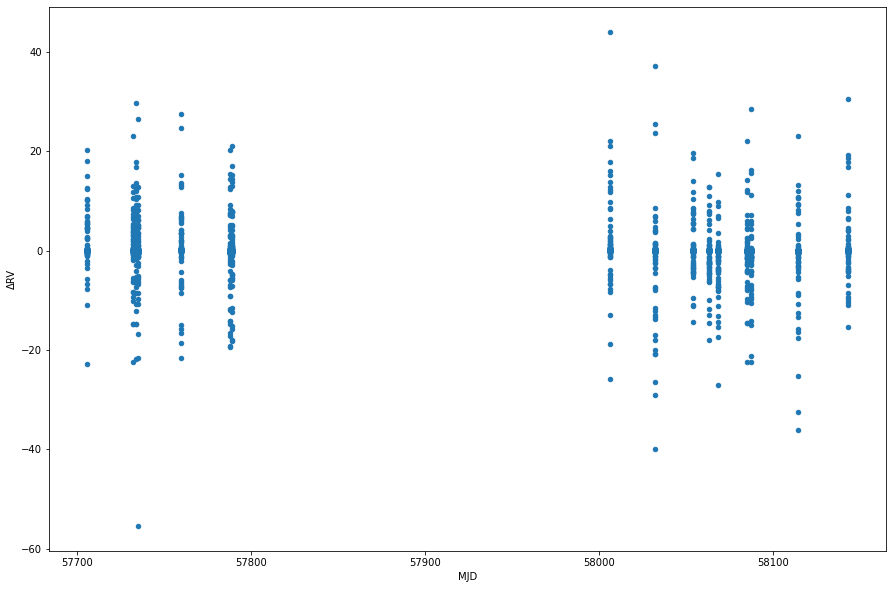

In [81]:
# Plot ΔRV versus epoch

df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

In [82]:
# Consider limiting ΔRV range?

df_cutoff = df.loc[(df['ΔRV'] < 1) & (df['ΔRV'] > -1)]

df_cutoff.sort_values('ΔRV')

,Target ID,MJD,OBSVHELIO (km/s),OBSVREL Error (km/s),<RV>,ΔRV
369,apo25m.5226.150-08-RV.2M03281678+4513003,57732,1.472417,0.065090,2.456475,-0.984058
3302,apo25m.5226.150-08-RV.2M03411209+4530317,57789,-33.110073,0.224766,-32.182084,-0.927989
1756,apo25m.5226.150-08-RV.2M03330449+4732443,58085,-56.091194,0.064767,-55.192485,-0.898709
1689,apo25m.5226.150-08-RV.2M03325400+4641080,58054,-2.538757,1.030917,-1.664955,-0.873803
1575,apo25m.5226.150-08-RV.2M03323778+4716306,58006,44.638680,0.008422,45.489041,-0.850361
...,...,...,...,...,...,...
419,apo25m.5226.150-08-RV.2M03282484+4535044,57735,-8.687350,0.660753,-9.577363,0.890013
2630,apo25m.5226.150-08-RV.2M03371083+4537137,57789,-14.980543,0.011571,-15.937572,0.957029
3110,apo25m.5226.150-08-RV.2M03400345+4520415,57789,-1.775444,0.734468,-2.740936,0.965492
2809,apo25m.5226.150-08-RV.2M03380104+4603136,58054,-11.825833,0.002948,-12.807833,0.982000


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

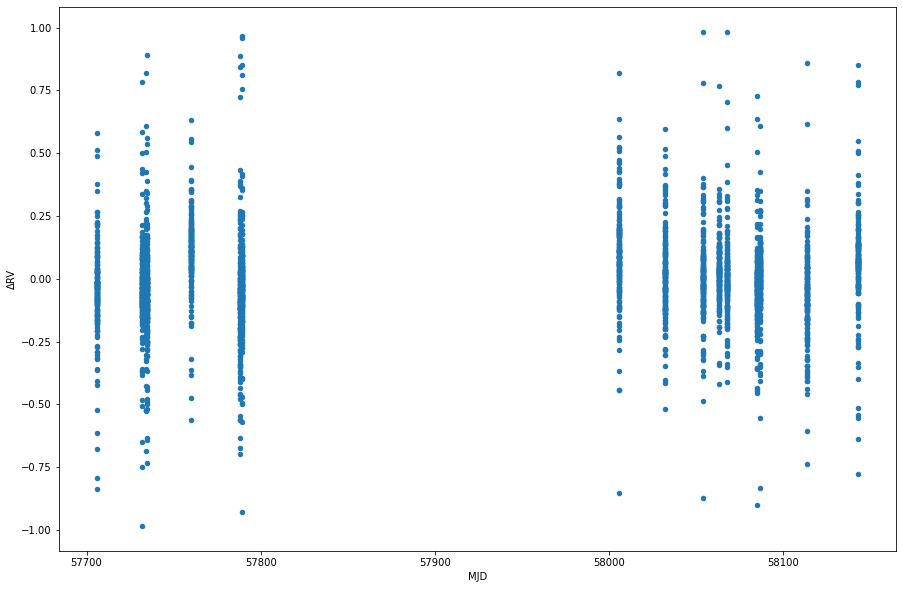

In [83]:
# Plot ΔRV versus epoch for cutoff dataframe

df_cutoff.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter', figsize=(15,10))

## Step 2
- Condense all ΔRVs into a single point per MJD

In [84]:
# Identify list of unique MJDs

unique_mjd = Counter(df['MJD'])
unique_mjd_list = unique_mjd.keys()

In [85]:
unique_mjd_list

dict_keys([57706, 58143, 58114, 58087, 58085, 58063, 58054, 58032, 58068, 57789, 57788, 57760, 57735, 57734, 57732, 58006])

In [86]:
# Obtain weighted average ΔRV for each MJD

combined_weightedRVs = []

for mjd in unique_mjd_list:
    mjd_df = df_bad[df_bad['MJD'] == mjd]
    mjd_RVs = list(mjd_df['ΔRV'])
    mjd_sigma = list(mjd_df['OBSVREL Error (km/s)'])
    weight = [1 / (mjd_sigma[s]**2) for s in range(len(mjd_sigma))]
    print('Sum of ΔRV for MJD', mjd, ':', sum(mjd_RVs))
    print('Sum of weights:', sum(weight))
    combined_weightedavg = sum([mjd_RVs[r] * weight[r] for r in range(len(mjd_RVs))]) / sum(weight) #[r] for r in range(len(mjd_sigma)))
    # combined_weightedavg = sum([mjd_RVs[r] * mjd_sigma[r] for r in range(len(mjd_RVs))]) / sum(mjd_sigma) #[r] for r in range(len(mjd_sigma)))
    combined_weightedRVs.append(combined_weightedavg)

Sum of ΔRV for MJD 57706 : -3.8998215149803173
Sum of weights: 4291752.119677863
Sum of ΔRV for MJD 58143 : 12.379922485689438
Sum of weights: 6731679.588005798
Sum of ΔRV for MJD 58114 : -10.91450155970655
Sum of weights: 1378354.5700824112
Sum of ΔRV for MJD 58087 : 5.084236040522046
Sum of weights: 5563717.416805604
Sum of ΔRV for MJD 58085 : -6.959567190079474
Sum of weights: 4627294.602975273
Sum of ΔRV for MJD 58063 : 8.545357353152337
Sum of weights: 7337704.798583684
Sum of ΔRV for MJD 58054 : 3.2286464137701714
Sum of weights: 5775348.5201352965
Sum of ΔRV for MJD 58032 : 5.888853519189173
Sum of weights: 2544646.622286594
Sum of ΔRV for MJD 58068 : 2.264031794528901
Sum of weights: 5665542.79546532
Sum of ΔRV for MJD 57789 : -3.08303612904486
Sum of weights: 5237553.822089278
Sum of ΔRV for MJD 57788 : -11.47143968481658
Sum of weights: 1180328.518300221
Sum of ΔRV for MJD 57760 : 20.985134803330713
Sum of weights: 3222734.8405430163
Sum of ΔRV for MJD 57735 : -8.837961015400

In [87]:
combined_weightedRVs

[-0.09074977117252511,
 0.051936933323339686,
 -0.05111122833447311,
 0.086665222545165,
 0.022736998062197575,
 0.08824972119994577,
 0.03711061909055734,
 0.03138012552296679,
 0.04296740706836883,
 -0.04901531076123321,
 -0.11536461653587521,
 0.09722286201394409,
 -0.08035147781765992,
 -0.02305196362769338,
 -0.10129515931944673,
 0.08484316909658798]

In [88]:
# Create dataframe for MJD and combined weighted ΔRV values

weightedavg_data = [unique_mjd_list, combined_weightedRVs]
weightedavg_df = pd.DataFrame(weightedavg_data).transpose()
weightedavg_df.columns = ['MJD', 'Combined ΔRV (km/s)']

In [89]:
weightedavg_df

,MJD,Combined ΔRV (km/s)
0,57706.0,-0.090750
1,58143.0,0.051937
2,58114.0,-0.051111
3,58087.0,0.086665
4,58085.0,0.022737
5,58063.0,0.088250
6,58054.0,0.037111
7,58032.0,0.031380
8,58068.0,0.042967
9,57789.0,-0.049015


<AxesSubplot:xlabel='MJD', ylabel='Combined ΔRV (km/s)'>

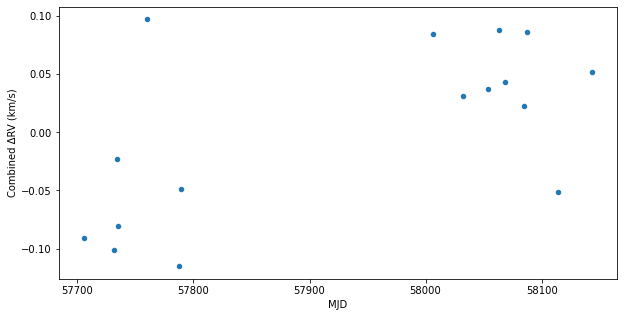

In [92]:
# Plot combined weighted ΔRV values vs MJD

weightedavg_df.plot(x='MJD', y='Combined ΔRV (km/s)', kind='scatter', figsize=(10,5))

## Step 3
- Calculate statistical error: sigma_< RV > = sqrt(1/sum(weight))
- Plot statistical error bars
- Fit line to free parameters (i.e. x & y values), check gradient for anything interesting?

## Step 4
- Check distribution of ~200 data points used to create combined ΔRV
    - Don't expect Gaussian, but should be relatively well-behaved (big tail suggests outlier that should be removed)
- Try looking at flags listed on SDSS sites to remove for other errors

## Step 5
- Try repeating this process for other plates
- Combine plots for all plates (fill in gaps in MJD)
    - Difference in N measurements per object doesn't matter bc statistical error will be larger with fewer data points, makes up for it

## Step ?
- Try PCA

In [93]:
features = ['MJD', 'ΔRV']

In [94]:
x2 = df.loc[:, features].values

In [95]:
y2 = df.loc[:, ['Target ID']].values

In [96]:
x2 = StandardScaler().fit_transform(x2)

In [97]:
x2.shape

(3408, 2)

In [98]:
# Check standard dev is 1.0

np.mean(x2), np.std(x2)

(1.9546180011006278e-18, 1.0)

In [99]:
feat_cols = ['feature'+str(i) for i in range(x2.shape[1])]

In [100]:
normalised_data = pd.DataFrame(x2,columns=feat_cols)

In [101]:
normalised_data.tail()

,feature0,feature1
3403,-1.212567,0.010070
3404,-1.370993,-0.038174
3405,1.115074,-0.005590
3406,-0.865249,0.001966
3407,1.291780,0.036056


In [102]:
pca = PCA(n_components = 2)

In [103]:
principalComponents = pca.fit_transform(x2)

In [104]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [105]:
principalDf.tail()

,principal component 1,principal component 2
3403,-0.864535,0.850293
3404,-0.942445,0.996431
3405,0.792429,-0.784524
3406,-0.613213,0.610433
3407,0.887931,-0.938921


In [106]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.52070766 0.47929234]


<Figure size 432x288 with 0 Axes>

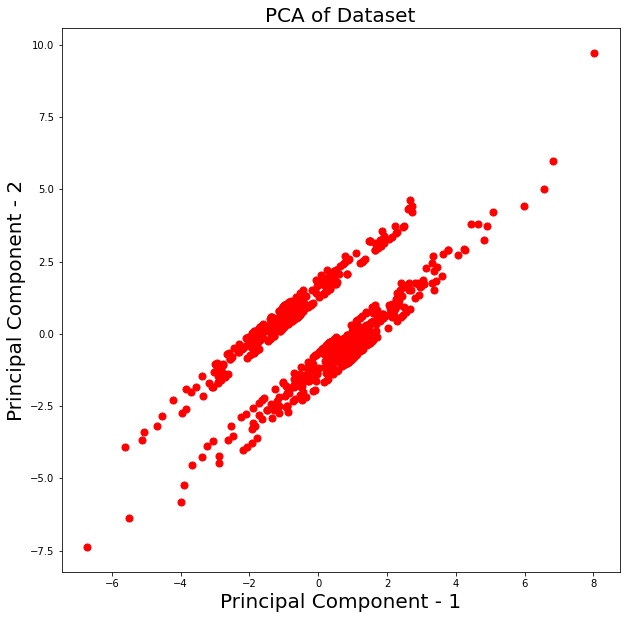

In [107]:
plt.figure()
plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Dataset",fontsize=20)
targets = [df['Target ID']]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Target ID'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

In [165]:
finalDf = pd.concat([principalDf, df[['Target ID']]], axis = 1)

In [166]:
finalDf

,principal component 1,principal component 2,Target ID
0,-0.018731,-1.022855,apo25m.5226.150-08-RV.2M03252400+4614203
1,-0.025336,-0.914397,apo25m.5226.150-08-RV.2M03252400+4614203
2,-0.025844,-0.906054,apo25m.5226.150-08-RV.2M03252400+4614203
3,-0.026098,-0.901884,apo25m.5226.150-08-RV.2M03252400+4614203
4,-0.032449,-0.797598,apo25m.5226.150-08-RV.2M03252400+4614203
...,...,...,...
3627,-0.109078,0.488988,apo25m.5226.150-08-RV.2M03415658+4626067
3628,-0.113397,0.559901,apo25m.5226.150-08-RV.2M03415658+4626067
3629,-0.113905,0.568244,apo25m.5226.150-08-RV.2M03415658+4626067
3630,-0.120764,0.680872,apo25m.5226.150-08-RV.2M03415658+4626067
